<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Чтение-данных-из-файла" data-toc-modified-id="Чтение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Чтение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Изучение-параметров:-площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Убираем-выбросы" data-toc-modified-id="Убираем-выбросы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Убираем выбросы</a></span></li><li><span><a href="#Влияние-факторов-на-стоимость-квартиры:-площадь,-расстояние-до-центра,-число-комнат" data-toc-modified-id="Влияние-факторов-на-стоимость-квартиры:-площадь,-расстояние-до-центра,-число-комнат-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Влияние факторов на стоимость квартиры: площадь, расстояние до центра, число комнат</a></span></li><li><span><a href="#Выберем-10-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Выберем-10-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Выберем 10 населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Выясняем-какая-область-входит-в-центр" data-toc-modified-id="Выясняем-какая-область-входит-в-центр-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выясняем какая область входит в центр</a></span></li><li><span><a href="#Выделение-и-анализ-сегмента-квартир-в-центре-Санкт-Петербурга." data-toc-modified-id="Выделение-и-анализ-сегмента-квартир-в-центре-Санкт-Петербурга.-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Выделение и анализ сегмента квартир в центре Санкт-Петербурга.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир
Целью проекта является научиться определять рыночную стоимость объектов недвижимости. Для выполнения цели необходимо решить следующие задачи:

1. Провести исследовательский анализ данных.
2. Выделим факторы влияющие на стоимость квартиры. Найдем населенные пункты с наибольшим числом объявлений. 
3. Проанализировать квартиры в центре Санкт-Петербурга.
4. Сформулировать выводы.
<div>Данные для работы предоставлены заказчиком. Они содержат архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
<div>По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Чтение данных из файла

In [1]:
import pandas as pd #импортируем pandas как pd
import numpy as np #импортируем библиотеку numpy
from matplotlib import pyplot as plt
#импорт библиотеки позволяющей игнорировать несущественные ошибки
import warnings
warnings.filterwarnings('ignore')
#столбцы и строки полностью, формат округлен
pd.set_option('display.max_columns', None)

#лишние запятые и экспонентациальные формы убираем
pd.options.display.float_format = '{:,.2f}'.format
#вывод значений без сокращений
pd.set_option('display.max_colwidth', -1)

#data = pd.read_csv('/datasets/real_estate_data.csv', sep ='\t') 
# читаем файл с данными и меняем разделитель
data = pd.read_csv('C:\\Users\\algol\\Downloads\\real_estate_data.csv', sep ='\t')


Для удобства зададим функции для получения информации о данных.

## Предобработка данных

In [2]:
#функция для вывода состава столбцов
def describe_cols(df_data):
    df = df_data
    values = pd.DataFrame()
    
    for col in df.columns:
        values[col] = [df[col].unique(), df[col].dtypes, df[col].nunique()]
        
    return values.transpose().sort_values(by=1, ascending=True).rename(
        {0: 'Значения', 1: 'тип данных', 2: 'Кол-во уникальных значений'}, axis=1)


#функция для вывода пустых значений и их доли в столбцах датафрейма, 
#а также явных дубликатов
def nan_values(df_data):
    df = df_data
    count_missing = df.isna().sum()
    percent_missing = round(df.isna().sum() * 100 / len(df), 2)
    count_duplicates = df.duplicated().sum()
    
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                     'num_missing': count_missing,
                                     'percent_missing': percent_missing,
                                     'num_duplicates': count_duplicates})
    
    return missing_value_df


#функция для вывода информации о файле
def df_info (df_data):
    print('Количество строк файла:', df_data.shape[0])
    print('Количество столбцов файла:', df_data.shape[1])
    print()
    print('Информация о содержимом файла:')
    display(describe_cols(df_data))
    print()
    print('Информация о пропусках и явных дубликатах данных:')
    display(nan_values(df_data))
    print()
    print('Первые пять строк таблицы:')
    display(df_data.head())

In [3]:
df_info(data)

Количество строк файла: 23699
Количество столбцов файла: 22

Информация о содержимом файла:


,Значения,тип данных,Кол-во уникальных значений
studio,"[False, True]",bool,2
open_plan,"[False, True]",bool,2
floor,"[8, 1, 4, 9, 13, 5, 6, 22, 26, 7, 3, 2, 11, 15, 18, 10, 19, 16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31]",int64,33
rooms,"[3, 1, 2, 4, 5, 6, 0, 7, 11, 8, 14, 10, 15, 9, 19, 16, 12]",int64,17
total_images,"[20, 7, 10, 0, 2, 6, 5, 18, 9, 1, 16, 11, 8, 12, 13, 3, 15, 17, 14, 19, 32, 4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29, 26, 50, 42, 37]",int64,38
ceiling_height,"[2.7, nan, 3.03, 2.5, 2.67, 2.56, 3.05, 2.75, 2.6, 2.9, 2.8, 2.55, 3.0, 2.65, 3.2, 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15, 3.5, 3.3, 2.71, 4.0, 2.47, 2.73, 2.84, 3.1, 2.34, 3.4, 3.06, 2.72, 2.54, 2.51, 2.78, 2.76, 25.0, 2.58, 3.7, 2.52, 5.2, 2.87, 2.66, 2.59, 2.0, 2.45, 3.6, 2.92, 3.11, 3.13, 3.8, 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3, 5.0, 2.79, 2.95, 4.06, 2.94, 3.82, 3.54, 3.53, 2.83, 4.7, 2.4, 3.38, 3.01, 5.6, 3.65, 3.9, 3.18, 3.35, 2.3, 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, ...]",float64,183
ponds_around3000,"[2.0, 0.0, 3.0, 1.0, nan]",float64,4
parks_nearest,"[482.0, nan, 90.0, 84.0, 112.0, 310.0, 294.0, 590.0, 420.0, 759.0, 248.0, 517.0, 411.0, 452.0, 532.0, 459.0, 725.0, 47.0, 620.0, 675.0, 531.0, 526.0, 271.0, 363.0, 648.0, 382.0, 334.0, 167.0, 445.0, 231.0, 511.0, 751.0, 666.0, 384.0, 127.0, 241.0, 488.0, 156.0, 576.0, 285.0, 633.0, 15.0, 215.0, 533.0, 141.0, 366.0, 341.0, 589.0, 344.0, 508.0, 417.0, 762.0, 441.0, 559.0, 749.0, 123.0, 501.0, 10.0, 1133.0, 1205.0, 516.0, 860.0, 276.0, 980.0, 463.0, 591.0, 239.0, 651.0, 1021.0, 485.0, 586.0, 370.0, 688.0, 275.0, 546.0, 466.0, 139.0, 251.0, 537.0, 627.0, 104.0, 450.0, 657.0, 578.0, 77.0, 121.0, 314.0, 195.0, 556.0, 469.0, 75.0, 398.0, 681.0, 50.0, 92.0, 929.0, 320.0, 510.0, 741.0, 357.0, ...]",float64,995
parks_around3000,"[1.0, 0.0, 2.0, nan, 3.0]",float64,4
cityCenters_nearest,"[16028.0, 18603.0, 13933.0, 6800.0, 8098.0, nan, 19143.0, 11634.0, 15008.0, 13878.0, 51677.0, 33058.0, 30759.0, 14259.0, 10698.0, 14616.0, 10842.0, 12843.0, 19311.0, 9722.0, 14211.0, 2336.0, 14640.0, 10510.0, 11456.0, 30710.0, 11526.0, 12944.0, 12889.0, 32321.0, 12739.0, 3502.0, 16461.0, 12209.0, 12612.0, 30605.0, 10822.0, 11603.0, 12872.0, 12702.0, 16788.0, 16603.0, 30183.0, 6589.0, 6582.0, 18783.0, 14495.0, 12260.0, 9626.0, 18883.0, 15579.0, 14501.0, 4288.0, 4800.0, 10484.0, 51100.0, 8313.0, 12267.0, 49984.0, 23742.0, 32551.0, 14545.0, 15572.0, 14192.0, 18217.0, 19107.0, 9319.0, 27825.0, 15035.0, 13832.0, 11648.0, 7303.0, 13743.0, 16333.0, 8767.0, 2818.0, 13364.0, 16140.0, 9719.0, 10787.0, 15598.0, 5527.0, 32900.0, 9860.0, 26670.0, 6175.0, 5791.0, 8535.0, 21138.0, 9816.0, 9089.0, 12250.0, 50722.0, 4264.0, 15747.0, 13845.0, 17093.0, 32546.0, 11990.0, 52073.0, ...]",float64,7642



Информация о пропусках и явных дубликатах данных:


,column_name,num_missing,percent_missing,num_duplicates
total_images,total_images,0,0.00,0
last_price,last_price,0,0.00,0
total_area,total_area,0,0.00,0
first_day_exposition,first_day_exposition,0,0.00,0
rooms,rooms,0,0.00,0
ceiling_height,ceiling_height,9195,38.80,0
floors_total,floors_total,86,0.36,0
living_area,living_area,1903,8.03,0
floor,floor,0,0.00,0
is_apartment,is_apartment,20924,88.29,0



Первые пять строк таблицы:


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00


Таблица содержит следующие столбцы:
<div>airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
<div>balcony — число балконов
<div>ceiling_height — высота потолков (м)
<div>cityCenters_nearest — расстояние до центра города (м)
<div>days_exposition — сколько дней было размещено объявление (от публикации до снятия)
<div>first_day_exposition — дата публикации
<div>floor — этаж
<div>floors_total — всего этажей в доме
<div>is_apartment — апартаменты (булев тип)
<div>kitchen_area — площадь кухни в квадратных метрах (м²)
<div>last_price — цена на момент снятия с публикации
<div>living_area — жилая площадь в квадратных метрах (м²)
<div>locality_name — название населённого пункта
<div>open_plan — свободная планировка (булев тип)
<div>parks_around3000 — число парков в радиусе 3 км
<div>parks_nearest — расстояние до ближайшего парка (м)
<div>ponds_around3000 — число водоёмов в радиусе 3 км
<div>ponds_nearest — расстояние до ближайшего водоёма (м)
<div>rooms — число комнат
<div>studio — квартира-студия (булев тип)
<div>total_area — площадь квартиры в квадратных метрах (м²)
<div>total_images — число фотографий квартиры в объявлении

### Выводы

<font color='green'><div>В полных столбцах 23699 значений. Но в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, airports_nearest и прочих (их большинство) много пропущенных значений. <div> Пропуски обусловлены как объективными причинами, так и возможными ошибками. Представлены все возможные типы данных. 

<font color='green'>Высоту потолков не трогаем. <div>Пропуски по жилой площади не трогаем. <div>Пропуски по аппартаментам не трогаем, там есть значения True, False, Nan (на что менять Nan непонятно).<div>Площадь кухни не трогаем.<div>Пропуски в балконах меняем на 0, т.к. вероятно, что там где пропуски балконов нет.<div>Названия населенных пунктов не трогаем. <div>Все пропуски касающиеся близости к парку, аэропорту или озеру не трогаем.<div>Пропуски в количестве дней размещения объявления не трогаем.<div>Этажность дома 0,36% пропусков, поэтому удаляем.

In [4]:
data['is_apartment'].loc[data['is_apartment']==True].count() #смотрим сколько значений True в аппартаментах


50

In [5]:
#т.к. количество пропусков 0,3% то их можно проигнорировать
data = data[(~data['floors_total'].isna())] #удаляем строки где пропуски по этажности
data['floors_total'].isna().sum()  #проверяем удаление этих строк


0

In [6]:
data.loc[data['balcony'].isna(), 'balcony'] = 0
data['balcony'].isna().sum()  #проверяем заполнение этих строк

0

<font color='green'>Замены типов данных: <div>first_day_exposition нужно из строк переводить в даты, <div>floors_total - из дробных нужно перевести в целые,  <div>is_apartment из строчных перевести в булев тип , <div>balcony перевести в целые.  <div>Меняем на целые, потому что вышеперечисленные параметры могут принимать только целые значения. 

In [7]:
data['floors_total'] = data['floors_total'].astype('int') #переводим в целочисленные значения
data['balcony'] = data['balcony'].astype('int')
data['is_apartment'] = data['is_apartment'].astype('bool') #переводим в булев тип
#переводим из строк в даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.info()#проверяем

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int32         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  bool          
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

<font color='green'>Некоторые пропуски удалены, некоторые заполнены. Данные изменены на подходящий тип. 

In [8]:
#найдем для наглядности медиану в столбце ceiling_height
display(data['ceiling_height'].median())
#заменим пропуски на медианные значения
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].isna().sum()  #проверяем заполнение строк с пропусками

2.65

0

In [9]:
#создадим столбец соотношения жилой к общей
data['living_ratio'] = data['living_area'] / data['total_area']
# заполним пропуски в соотношении медианой с группировкой по комнатам
data['living_ratio'] = data['living_ratio'].fillna(data.groupby('rooms')['living_ratio'].median()) 
# заполняем пропуски жилой площади
isna_filter = data['living_area'].isna()
data.loc[isna_filter, 'living_area'] = data.loc[isna_filter, 'total_area'] * data.loc[isna_filter, 'living_ratio'] 
#проверяем заполнение пропусков
data['living_area'].isna().sum()

1868

In [10]:
#заполним нулем площадь кухни там где студии
data.loc[(data["kitchen_area"].isna()) & (data["studio"]==True), "kitchen_area"] = 0
#создадим столбец соотношения кухни к общей
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']
# заполним пропуски в соотношении медианой
data['kitchen_ratio'] = data['kitchen_ratio'].fillna(data['kitchen_ratio'].median()) 
# заполняем пропуски площади кухни
isna_filter1 = data['kitchen_area'].isna()
data.loc[isna_filter1, 'kitchen_area'] = data.loc[isna_filter1, 'total_area'] * data.loc[isna_filter1, 'kitchen_ratio'] 
#проверяем заполнение пропусков
data['kitchen_area'].isna().sum()

0

## Расчёты и добавление результатов в таблицу

In [11]:
# посчитаем цену квадратного метра и добавим столбец;  
data['price_square_meter'] = data['last_price']/data['total_area']
#посчитаем и добавим столбцы с днем недели, месяцем и годом публикации объявления;
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year
#посчитаем и добавим столбцы для соотношения жилой и общей площади, а также отношение площади кухни к общей.
data['ratio_living']= data['living_area']/data['total_area']
data['ratio_kitchen']= data['kitchen_area']/data['total_area']


In [12]:
#Добавим типы этажей квартиры; варианты — первый, последний, другой; 
def floors(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor']  == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floors, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_ratio,kitchen_ratio,price_square_meter,weekday_exposition,month_exposition,year_exposition,ratio_living,ratio_kitchen,floor_type
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN,0.47,0.23,"120,370.37",3,3,2019,0.47,0.23,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00,0.46,0.27,"82,920.79",1,12,2018,0.46,0.27,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0.61,0.15,"92,785.71",3,8,2015,0.61,0.15,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,2.65,14,100.46,9,True,False,False,27.30,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,0.63,0.17,"408,176.10",4,7,2015,0.63,0.17,другой
4,2,"10,000,000.00",100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0.32,0.41,"100,000.00",1,6,2018,0.32,0.41,другой


<font color='green'>Новые, рассчитанные столбцы появились в таблице. 

## Исследовательский анализ данных

### Изучение параметров: площадь, цена, число комнат, высота потолков

Text(0.5, 0, 'total_area (кв.м)')

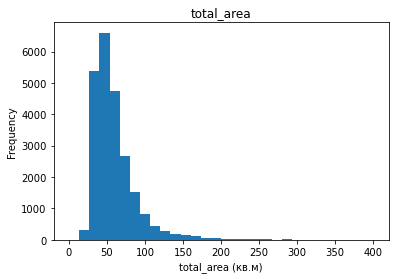

In [13]:
from matplotlib import pyplot as plt
#Построим гистограмму для площади. Поставил диапазон от 0 до 400 для наглядности. 
data['total_area'].plot(kind ='hist', title = 'total_area', bins = 30, range = (0, 400))
plt.xlabel('total_area (кв.м)')

763000000.0


Text(0.5, 0, 'Цена квартиры от 40 млн до max (руб)')

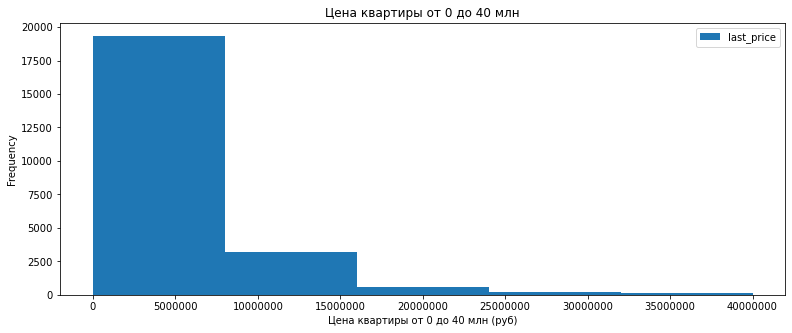

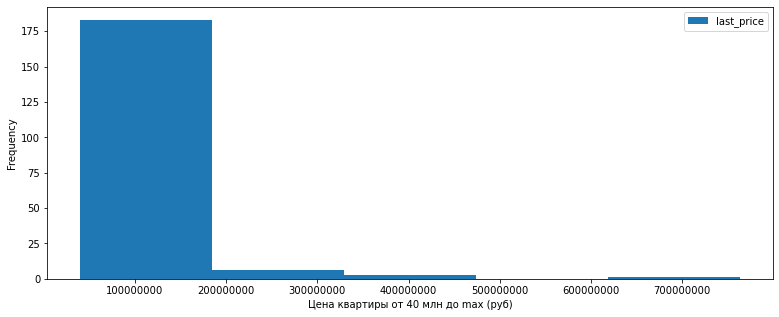

In [14]:
#Построим гистограмму для цены. Поставил 2 диапазона и посчитал максимум для наглядности. 
print(data['last_price'].max()) #нахожу максимальную цену. Делю на два интервала и строю две гистограммы: до 40 мио и от 40 мио до max.
data.plot(y='last_price', title = 'Цена квартиры от 0 до 40 млн', kind='hist', bins = 5, range = (0, 40000000), figsize=(13,5)).ticklabel_format(style='plain')
plt.xlabel('Цена квартиры от 0 до 40 млн (руб)')
data.plot(y='last_price', kind='hist', bins = 5, range = (40000000, 763000000), figsize=(13,5)).ticklabel_format(style='plain')
plt.xlabel('Цена квартиры от 40 млн до max (руб)')

Text(0.5, 1.0, 'Количество комнат')

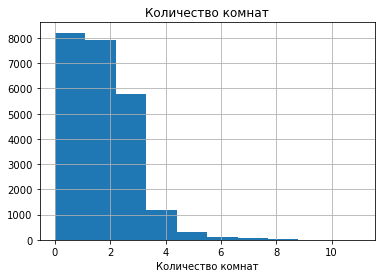

In [15]:
#Построим гистограмму для числа комнат.
data['rooms'].hist(range = (0, 11))
plt.xlabel('Количество комнат')
plt.title('Количество комнат')

Text(0.5, 1.0, 'Высота потолков, м')

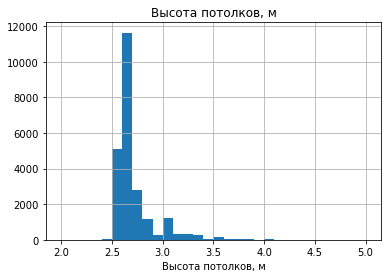

In [16]:
#Построим гистограмму для высоты потолков.
data['ceiling_height'].hist(bins = 30, range = (2,5))
plt.xlabel('Высота потолков, м')
plt.title('Высота потолков, м')

<font color='green'>1. Общая площадь квартир в целом по выборке распределена равномерно. Наибольшее количество значений сосредоточено около 50 кв.м. <div>2. В целом по выборке наиболее часто встречается цена ближе к 5 милионам и меньше. <div>3. Основная масса в общей выборке по количеству комнат находится на значениях 1 и 2. <div>4. Наиболее часто встречающиеся значения высоты потолков в целом по выборке составляют 2,5 м. Также есть значения в 3 м, но их в 5 раз меньше.

### Изучение времени продажи квартиры

Text(0.5, 1.0, 'Время продажи квартиры (дни)')

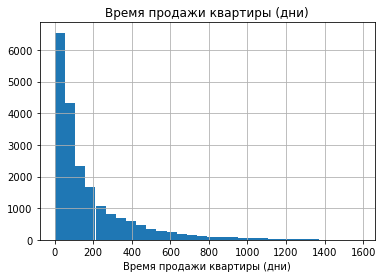

In [17]:
#Построим гистограмму для времени продажи квартиры.
data['days_exposition'].hist(bins = 30)
data['days_exposition'].describe()
plt.xlabel('Время продажи квартиры (дни)')
plt.title('Время продажи квартиры (дни)')

In [18]:
data['days_exposition'].describe()

count   20,441.00
mean    180.88   
std     219.69   
min     1.00     
25%     45.00    
50%     95.00    
75%     232.00   
max     1,580.00 
Name: days_exposition, dtype: float64

<font color='green'>Медиана указывает на среднее количество значений в выборке и составляет 95 дней. Будем считать, что обычно продажа занимает 95 дней. <div>Первый квартиль 45 дней, поэтому можно считать, что если в течении месяца (30 дней) квартира продана, то это быстро. <div>Долгий период продаж можно считать год и более(4 й квартиль). Максимально длительная продажа квартиры была более 4х лет. 

### Убираем выбросы

<AxesSubplot:>

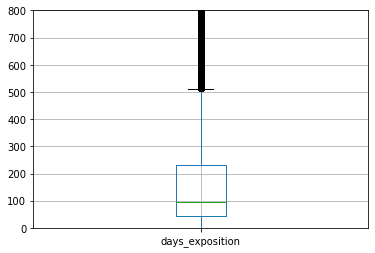

In [19]:
#построим ящик с усами для определения выбросов, которыми можно пренебречь
plt.ylim(0, 800)
data.boxplot(column = 'days_exposition') 

<font color='green'>Нижний ус видимо ноль, поэтому снизу не будет экстремальных выбросов, а те что выше 510 уже выбросы. Построим гистограмму от 510 и выше.

<AxesSubplot:>

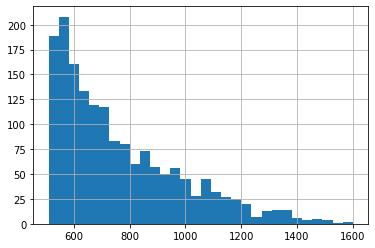

In [20]:
data['days_exposition'].hist(range = (510, 1600), bins = 30)


<font color='green'>Количество квартир продающихся дольше 1200 дней на мой взгляд несущественно и им можно пренебречь. Там будет не более 200 значений.

In [21]:
#Отсекаем в датафрейме все квартиры, которые продаются более 1200 дней.
data = data[data['days_exposition']<=1200]
data['days_exposition'].describe() #проверяем

count   20,351.00
mean    175.80   
std     206.31   
min     1.00     
25%     45.00    
50%     95.00    
75%     228.50   
max     1,200.00 
Name: days_exposition, dtype: float64

<font color='green'>Максимальное количество дней продажи составляет 1200, соответственно строки с большими значениями удалены. 

### Влияние факторов на стоимость квартиры: площадь, расстояние до центра, число комнат

In [22]:
# Изучим зависимость цены от площади
display('Корреляция цена-площадь:', data['last_price'].corr(data['total_area']))
# Изучим зависимость цены числа комнат
display('Корреляция цена-число комнат:', data['last_price'].corr(data['rooms']))
# Изучим зависимость цены от удалённости от центра.
display('Корреляция цена-расстояние до центра:', data['last_price'].corr(data['cityCenters_nearest']))

'Корреляция цена-площадь:'

0.643159111416254

'Корреляция цена-число комнат:'

0.35320475351299324

'Корреляция цена-расстояние до центра:'

-0.19176418365102932

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

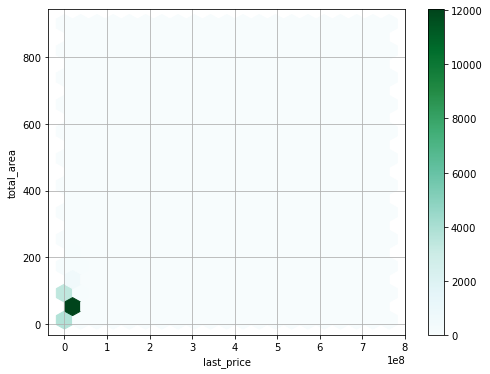

In [23]:
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

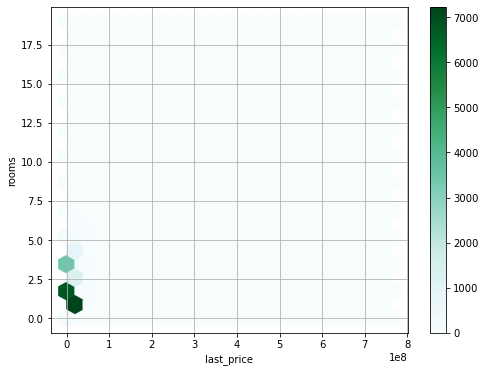

In [24]:
data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='last_price', ylabel='cityCenters_nearest'>

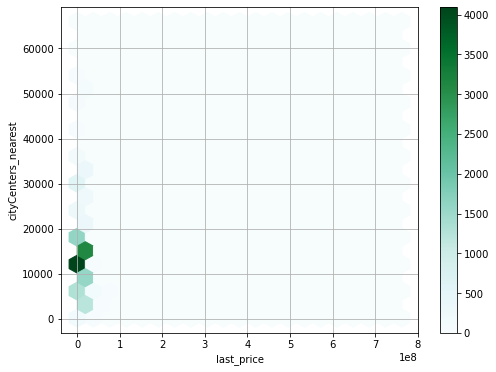

In [25]:
data.plot(x='last_price', y='cityCenters_nearest', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<font color='green'>Цена зависит от площади и числа комнат, но от площади зависимость почти в 2 раза выше. Цена зависит от расстояния до центра и зависимость отрицательна, поэтому чем меньше расстояние до центра, тем цена выше. 

In [26]:
#Найдем медианные значения цены для разных типов этажей:
data.groupby('floor_type')['last_price'].median()

floor_type
другой      4,700,000.00
первый      3,800,000.00
последний   4,250,000.00
Name: last_price, dtype: float64

<font color='green'>Цена квартир на первом этаже дешевле, чем на последнем и среднем. В свою очередь цена на последнем этаже дешевле, чем на среднем.

In [27]:
#Найдем медианные значения цены для разных дней недели:
data.groupby('weekday_exposition')['last_price'].median()
#Это необязательные вычисления для сопоставления с результатами метода corr

weekday_exposition
0   4,500,000.00
1   4,600,000.00
2   4,545,000.00
3   4,550,000.00
4   4,490,000.00
5   4,500,000.00
6   4,450,000.00
Name: last_price, dtype: float64

In [28]:
# Изучим зависимость цены от дня недели, месяца и года.
display('Корреляция цена-день недели:', data['last_price'].corr(data['weekday_exposition']))
display('Корреляция цена-месяц:', data['last_price'].corr(data['month_exposition']))
display('Корреляция цена-год:', data['last_price'].corr(data['year_exposition']))


'Корреляция цена-день недели:'

0.005070647078320044

'Корреляция цена-месяц:'

0.005293368742185101

'Корреляция цена-год:'

-0.05742469940935782

<font color='green'>Цена квартир не зависит от дня недели, месяца и года. 

<AxesSubplot:xlabel='last_price', ylabel='weekday_exposition'>

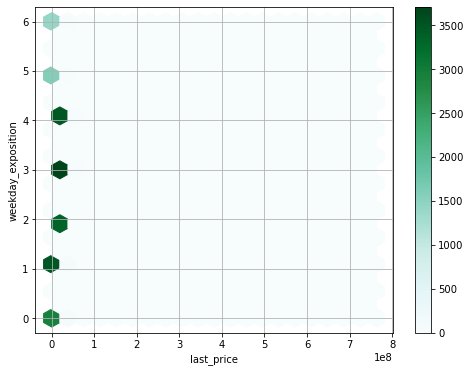

In [29]:
data.plot(x='last_price', y='weekday_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='last_price', ylabel='month_exposition'>

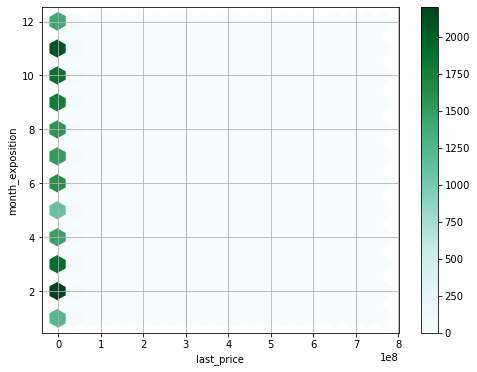

In [30]:
data.plot(x='last_price', y='month_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<AxesSubplot:xlabel='last_price', ylabel='year_exposition'>

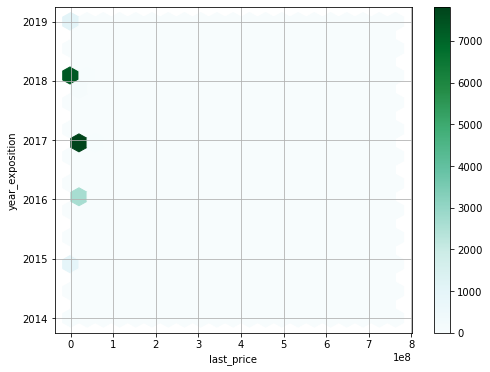

In [31]:
data.plot(x='last_price', y='year_exposition', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

<div class="alert alert-info"> На графиках картина та же, что и в цифрах. 

### Выберем 10 населённых пунктов с наибольшим числом объявлений

In [32]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений. Index сохраняет в виде списка
top10 = data['locality_name'].value_counts().head(10).index
#сохраним в переменной data_top10 срез со строками топ10 населенных пунктов
data_top10 = data.query('locality_name in @top10')
#посчитаем средние цены для 10 населенных пунктов
data_top10.groupby('locality_name')['price_square_meter'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург     112,354.18
Пушкин              102,093.20
деревня Кудрово     92,473.55 
посёлок Парголово   89,423.99 
посёлок Мурино      85,738.95 
посёлок Шушары      77,872.60 
Колпино             74,865.36 
Всеволожск          68,589.25 
Гатчина             67,928.33 
Выборг              57,084.58 
Name: price_square_meter, dtype: float64

<font color='green'>Самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая в Выборге.

### Выясняем какая область входит в центр

<AxesSubplot:xlabel='center_dist'>

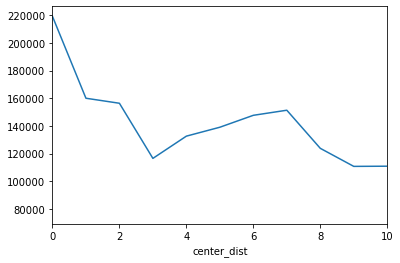

In [33]:
#Создаем новый столбец расстояния до центра в км и округляем до целых
data['center_dist'] = (data['cityCenters_nearest']/1000).round(0)
#создадим срез состоящий только из объявлений в Санкт-Петербурге
data_piter = data.loc[data['locality_name'] == 'Санкт-Петербург']
#посчитаем среднюю цену для каждого километра и построим график по возрастанию расстояния от центра
data_piter.groupby('center_dist')['price_square_meter'].mean().plot(xlim=(0, 10))



<font color='green'>График резко меняется на расстоянии 3 км, поэтому будем считать, что центр радиусом в 3 км. 

### Выделение и анализ сегмента квартир в центре Санкт-Петербурга.

<AxesSubplot:>

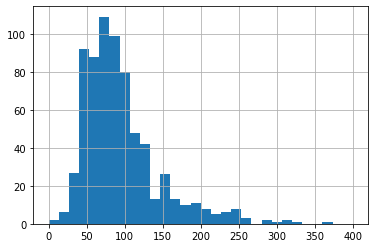

In [34]:
#Выделим сегмент квартир в центре
data_piter_centr = data_piter.query('center_dist<=3')
#Построим гистограмму для площади квартир в центре Санкт-Петербурга. Поставил диапазон от 0 до 400 для наглядности. 
data_piter_centr['total_area'].hist(bins = 30, range = (0, 400))


401300000.0


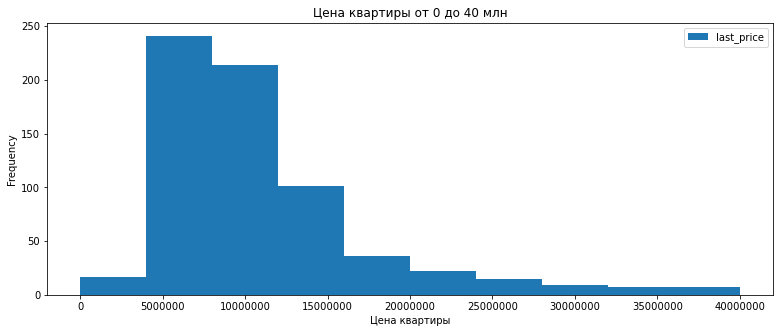

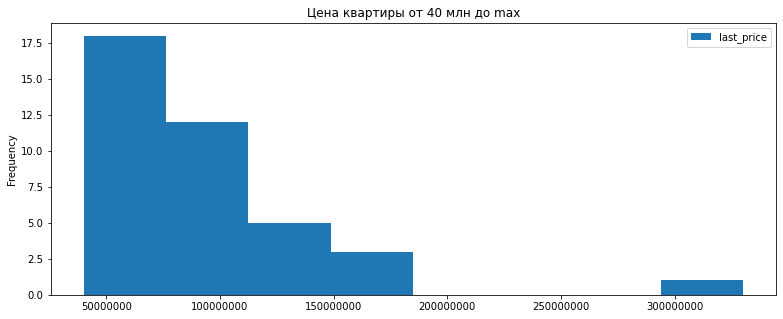

In [35]:
print(data_piter_centr['last_price'].max()) #нахожу максимальную цену. Делю на два интервала и строю две гистограммы: до 40 мио и от 40 мио до max.
data_piter_centr.plot(title = "Цена квартиры от 0 до 40 млн", y='last_price', kind='hist', bins = 10, range = (0, 40000000),figsize=(13,5)).ticklabel_format(style='plain')
plt.xlabel('Цена квартиры')
data_piter_centr.plot(title = "Цена квартиры от 40 млн до max",y='last_price', kind='hist', bins = 8, range = (40000000, 330000000),figsize=(13,5)).ticklabel_format(style='plain')

Text(0.5, 1.0, 'Число комнат')

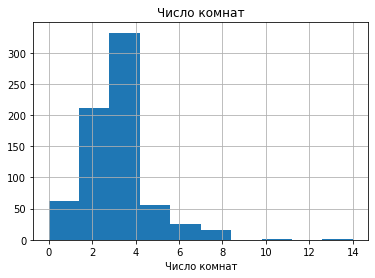

In [36]:
#Построим гистограмму для числа комнат.
data_piter_centr['rooms'].hist()
plt.xlabel('Число комнат')
plt.title('Число комнат')

Text(0.5, 1.0, 'Высота потолков, м')

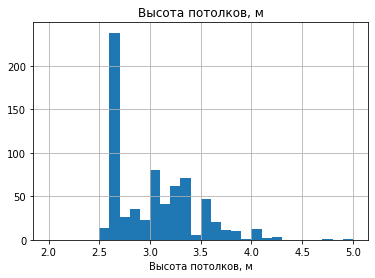

In [37]:
#Построим гистограмму для высоты потолков.
data_piter_centr['ceiling_height'].hist(bins = 30, range = (2,5))
plt.xlabel('Высота потолков, м')
plt.title('Высота потолков, м')

In [38]:
# Изучим зависимость цены от площади
display('Корреляция цена-площадь:', data_piter_centr['last_price'].corr(data_piter_centr['total_area']))
# Изучим зависимость цены числа комнат
display('Корреляция цена-число комнат:', data_piter_centr['last_price'].corr(data_piter_centr['rooms']))
# Изучим зависимость цены от удалённости от центра.
display('Корреляция цена-расстояние до центра:', data_piter_centr['last_price'].corr(data_piter_centr['cityCenters_nearest']))

'Корреляция цена-площадь:'

0.590480010426616

'Корреляция цена-число комнат:'

0.2706272307292517

'Корреляция цена-расстояние до центра:'

-0.1410062745763804

In [39]:
#Найдем медианные значения цены для разных типов этажей:
data_piter_centr.groupby('floor_type')['last_price'].median()

floor_type
другой      9,900,000.00
первый      6,200,000.00
последний   9,000,000.00
Name: last_price, dtype: float64

In [40]:
# Изучим зависимость цены от дня недели, месяца и года.
display('Корреляция цена-день недели:', data_piter_centr['last_price'].corr(data_piter_centr['weekday_exposition']))
display('Корреляция цена-месяц:', data_piter_centr['last_price'].corr(data_piter_centr['month_exposition']))
display('Корреляция цена-год:', data_piter_centr['last_price'].corr(data_piter_centr['year_exposition']))

'Корреляция цена-день недели:'

0.004168967643607763

'Корреляция цена-месяц:'

-0.006699171745882242

'Корреляция цена-год:'

-0.053886717369457195

<font color='green'>По результатам исследований квартир в центре Санкт-Петербурга можно сказать следующее: <div>1. Корреляция по площади и числу комнат с ценой есть, но она ничем не отличается от основной выборки. <div>2.Корреляция цены по дате размещения объявления низка, как и в основной выборке. <div>3. Также как и в основной выборке, есть корреляция в зависимости от этажа. <div>Вывод: факторы влияющие на стоимость квартиры, одинаково влияют на нее, как в центре Санкт-Петербурга, так и по всей выборке. 

## Общий вывод

<font color='green'>1. Общая площадь квартир в центре и в целом по выборке различается тем, что распределение квартир в центре более широкое и максимальное количество значений смещено вправо. Это означает, что в центре Санкт-Петербурга квартиры больше по площади относительно всей выборки. <div>2. В центре Санкт-Петербурга наиболее часто встречаемой стоимостью является цена в районе 10 милионов рублей. В целом по выборке эта цена ближе к 5 милионам и меньше. <div>3. Основная масса в общей выборке по количеству комнат находится на значениях 1 и 2, в центре Санкт-Петербурга больше значений выше 2х и ближе к 3м. Это коррелирует с тем, что площадь квартир в центре Санкт-Петербурга больше по площади,ведь квартиры в Санкт-Петербурге больше и по количеству комнат.<div>4.Высота потолков в центре Санкт-Петербурга значительно выше, чем в целом по выборке. 2,5 м по выборке против 3 м в центре Санкт-Петербурга. <div>5. Факторы влияющие на стоимость квартиры, одинаково влияют на нее, как в центре Санкт-Петербурга, так и по всей выборке. 